In [31]:
#!pip install spark

In [11]:

# Importer PySpark
import pyspark
from pyspark.sql import SparkSession
#Create SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
sc=spark.sparkContext

In [32]:

#Installer findspark
#!pip install findspark 

In [24]:
# Importer findspark
import findspark
findspark.init()
#importer pyspark
import pyspark
from pyspark.sql import SparkSession
#Creer  SparkSession qui va créer SparkContext.

spark = SparkSession.\
        builder.\
        appName("pyspark-nb-3-analysis").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "512m").\
        config("spark.eventLog.enabled", "true").\
        config("spark.eventLog.dir", "file:///opt/workspace/events").\
        getOrCreate()  

In [25]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession(sc)

In [26]:
df = spark.read.format('csv').load('CVD_cleaned.csv', header=True, sep=",")

In [27]:
df.show(1)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|      150.0|      32.66|14.54|            Yes|

In [53]:
# Lire le dataframe
health = spark.read.option("inferSchema", True).option('delimiter',',').option('header', True).option('encoding', 'UTF-8').csv("CVD_cleaned.csv")

In [54]:
health.show(10)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|      150.0|      32.66|14.54|            Yes|

In [59]:
# convertir le dataset en dataframe pandas

df = health.toPandas()

In [63]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


ANALYSE DESCRIPTIVE DES DONNEES

In [60]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


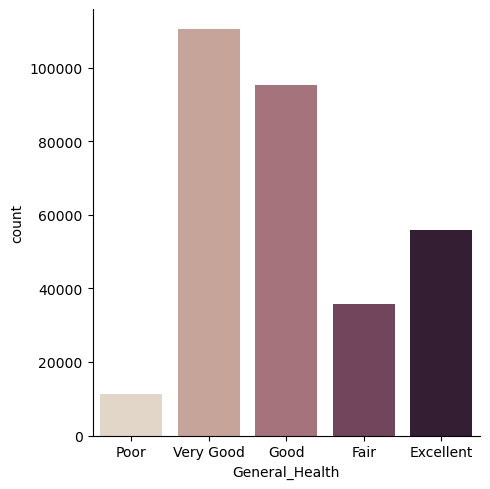

In [75]:
sns.catplot(data=df, x="General_Health", kind="count", palette="ch:.25")

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


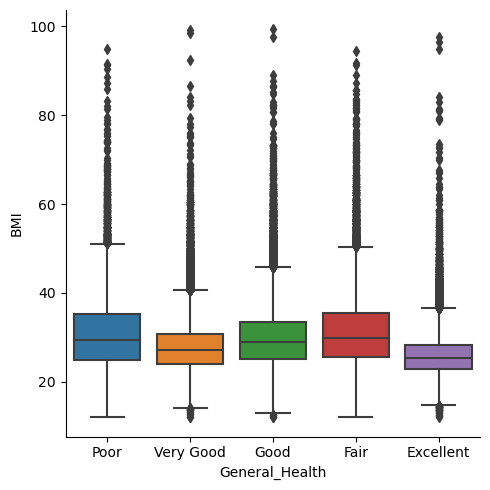

In [66]:
#ETAT SANITAIRE ET INDICE TAILLE CORPORELLE
import seaborn as sns
sns.catplot(data=df, x="General_Health", y="BMI", kind="box")

In [ ]:
#ETAT SANITAIRE ET CONSOMMATION DE LEGUMES_FRUITS

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


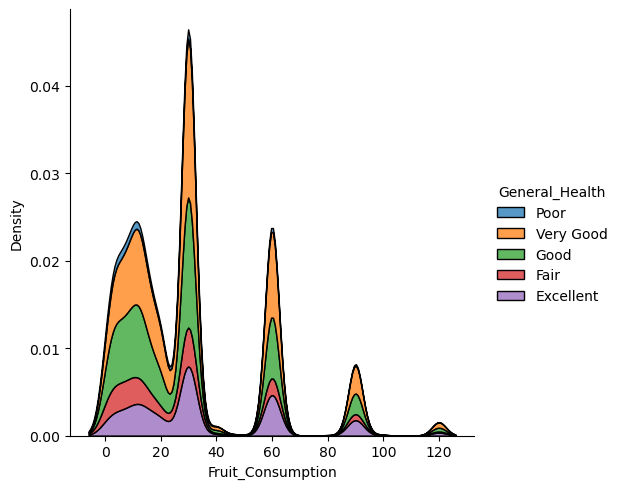

In [73]:
sns.displot(df, x="Fruit_Consumption", hue="General_Health", kind="kde",multiple="stack")

<Axes: xlabel='General_Health', ylabel='count'>

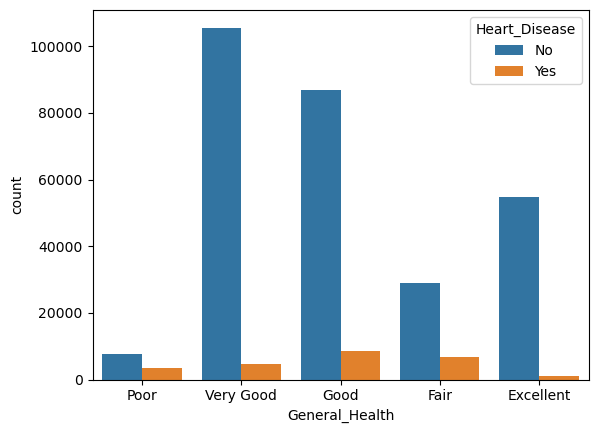

In [76]:
sns.countplot(data=df,x='General_Health',hue='Heart_Disease')

In [79]:
#Analyse des corrélations entre les variables

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df.corr()

/tmp/ipykernel_105/231525659.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


/tmp/ipykernel_105/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

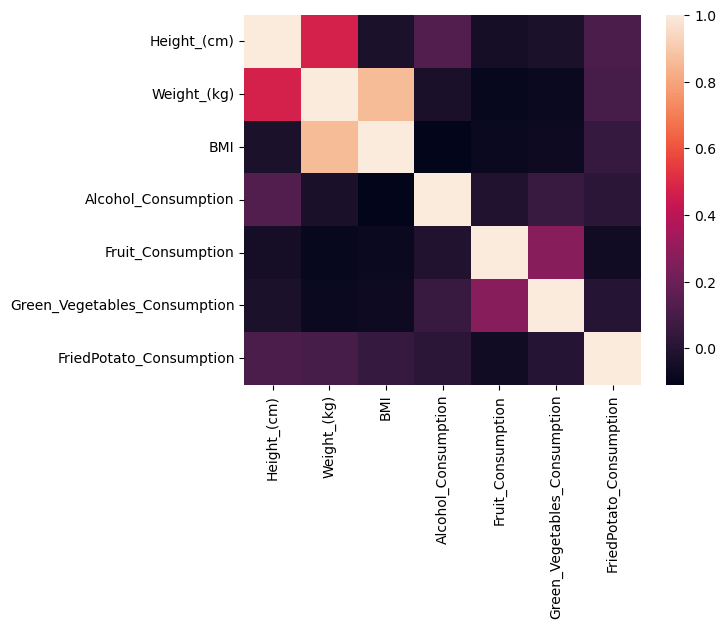

In [80]:
sns.heatmap(df.corr())

In [81]:
df.groupby('Heart_Disease').count()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Heart_Disease,,,,,,,,,,,,,,,,,,
No,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883,283883
Yes,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971,24971


In [82]:
#K Nearest Neighbors

#CLASSIFICATION ET PREDICTION

In [83]:
#verification des données vides
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [86]:
from sklearn.preprocessing import LabelEncoder
#Encodage des données
def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])
 
label_list = ["General_Health","Checkup", "Exercise","Heart_Disease","Skin_Cancer", "Other_Cancer","Depression","Diabetes", "Arthritis","Sex","Age_Category","Smoking_History"]
 
for l in label_list:
    label_encoder(l)
 
#Afficher les données
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [ ]:
#MACHINE LEARNING KNN CLASSIFICATION

In [87]:
#Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [89]:
#Diviser le dataset en variables en dépendantes et indépendantes
X = df.drop(["Heart_Disease"],axis=1)
y = df['Heart_Disease']
 
#Scinder en données d'entrainement(80%) et de test(20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 
 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (247083, 18)
X_test shape: (61771, 18)
y_train shape: (247083, 1)
y_test shape: (61771, 1)


In [90]:
#Standardization des données

#Mise en echelle
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [91]:
#Stocker les résultats du modele  dans deux  dictionnaires
result_dict_train = {}
result_dict_test = {}

In [92]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
#Afficher la précision
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Train Score: 0.9095688439688555
Test Score: 0.9099739359893801
